<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/%5B%ED%95%B8%EC%A6%88%EC%98%A8%5D_Chapter4_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8(training_linear_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 선형 회귀
1)  선형 회귀 모델의 예측
> $ \hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n} $
> - $ \hat{y}$ : 예측 값
> - $ n$ : 특성의 수
> - $ x_{i} $ : $i$ 번째 특성값
> - $  \theta_{j}$ : $j$번째 모델 파라미터

2) 선형 회귀 모델의 예측(벡터 형태)   
> $ \hat{y} = h_{\theta}(x) = \theta \cdot x  $
> - $  \theta $ : 편향 $\theta_{0}$ 과 $\theta_{1}$ 에서 $\theta_{n}$까지의 특성 가중치를 담은 모델의 파라미터 벡터
> - $x$ = $x_{0}$에서 $x_{n}$까지 담은 샘플의 특성 벡터. $x_{0}$는 항상 1이다.
> -  $ \theta \cdot x $ : 벡터  $ \theta $ 와 $x $의 점곱. $ \theta_{0}x_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} \cdots + \theta_{n}x_{n}$ 와 동일
> - $h_{\theta}(x)$ : 모델 파라미터 $\theta$를 사용한 가설 함수    


- 모델을 훈련 = 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것
> RMSE(평균제곱근오차)를 최소화하는 $\theta$를 찾아야 한다.


- 훈련세트 x에 대한 선형 회귀 가설 $h_{\theta}$의 MSE
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/mse_func.png" width=40%>

3) 정규방정식
1. 비용 함수를 최소화 하는 $\theta$값을 찾기 위한 정규 방정식
> $ \hat{\theta} = (X^{T}X)^{-1} X^{T}y $
> - $ \hat{\theta} $ = 비용함수를 최소화 하는 $ {\theta}$ 값
> - $y$ : $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

In [41]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False

np.random.seed(42)

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


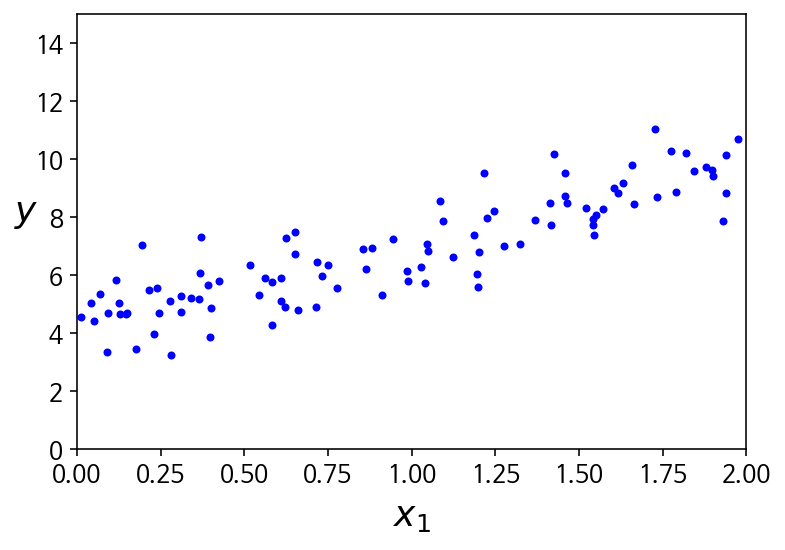

In [42]:
# 공식 테스트를 위한 선형처럼 보이는 데이터 생성
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

식 4-4: 정규 방정식

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [43]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# inv() 함수를 사용해 역행렬을 계싼하고 행렬 곱셈을 함
theta_best

array([[4.21509616],
       [2.77011339]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [44]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

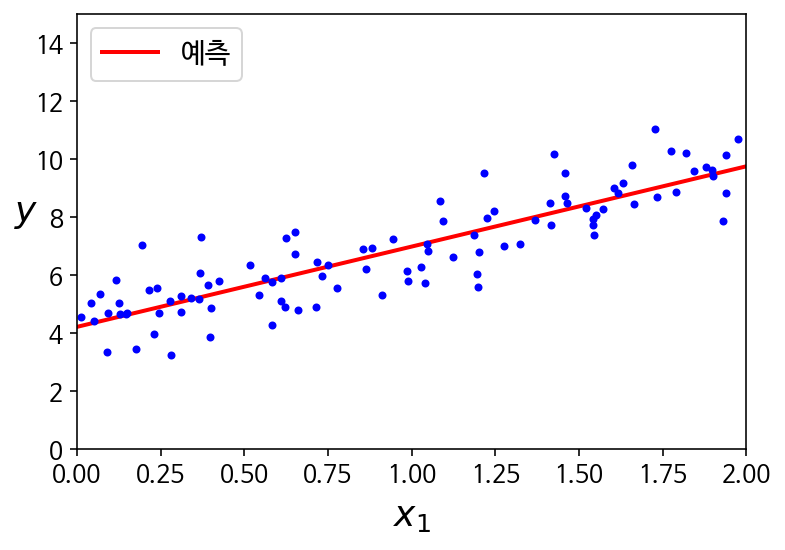

In [45]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression # 선형회귀 예측 수행

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# intercept : 절편
# coef : 기울기

(array([4.21509616]), array([[2.77011339]]))

In [47]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [48]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

- 이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:
- 유사역행렬 : 특잇값 분석(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산 된다.
> <img src = "https://sunshower76.github.io/public/img/2019-08-06-linear%20algebra-lecture33/img02.png">

In [49]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬 직접 구하는 함수. 절편과 기울기를 out

array([[4.21509616],
       [2.77011339]])

### 2. 경사 하강법
- 경사 하상법(GD) : 열 종류의 문제에서 최적의 해법을 찾을 수 잇는 일반적인 최적화 알고리즘. 비용 함수 최소화 위해 반복적 모델 파라미터를 조정한다.
> - 파라미터 벡터 $\theta$에 대해 비용 함수의 현재 gradient를 계산하여 감소하는 방향으로 진행. gradient가 0이되면 최솟값에 도달 한것이다.   
> - 무작위 초기화(random initalization) : $\theta$를 임의의 값으로 시작하는 것   
> - 학습률(learning rate) : 스텝의 크기 (작으면 반복 多 = 시간 多)   <br/>
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/gd1.png" width=50%>

- 경사하강법의 문제점 <br/>
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/gd3.png" width=50%>   
> - 전역 최솟값(global minimum)이 아닌 지역 최솟값(local minimum) 에 수렴함

- 해결 방법
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/gd4.png" width=100%>   
> - 선형회귀를 위한 MSE 비용함수는 볼록함수(convex function)형태여서 하나의 전역최솟값이 존재. 연속된 함수이며 기울기가 갑자기 변하지 않기 때문에 경사하강법으로 전역최솟값에 접근할 수 있다.
> - 모델이 가진 파라미터가 많을수록 이 공간의 차원은 커지고 검색이 더 어려워진다.

- 배치 경사 하강법
- 확률적 경사 하강법 (SGD)
- 미니 배치 경사 하강법

<br/>

#### 1) 배치 경사 하강법

- 편도함수(partial derivative) : 경사하강법 구현시 파라미터가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산해야 한다.
1. 비용 함수의 편도 함수
> <img src= " https://yganalyst.github.io/assets/images/ML/chap3/pratial.png" width = 50%>
2. 비용 함수의 gradient vector
> $
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})$    
> - 배치 경사 하강법(batch gradient descent) : 매 스텝에서 훈련 데이터 전체를 계산한다. 큰 훈련 세트에서 아주 느리다.

3. 경사 하강법의 스텝 : gradient vector가 구해지면 $\theta$에서 빼준다. 스텝의 크기를 결정하기 위해 학습률 $\eta$를 곱한다.
> $
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [50]:
# 배치 경사 하강법 : 매 경사 하강법 스텝에서 훈련세트 X에 대해서 계산 
eta = 0.1           # 학습률
n_iterations = 1000 # 학습 횟수
m = 100             # 샘플 갯수 (예제 갯수)

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):            # 1000번 반복
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)  # 배치 경사 하강법 식
  theta = theta - eta * gradients                # eta를 곱하면서 조금씩 내려간다.

theta # 정규방정식으로 찾은 것과 정확히 일치한다.

array([[4.21509616],
       [2.77011339]])

* 여러 학습률에 따른 경사 하강법


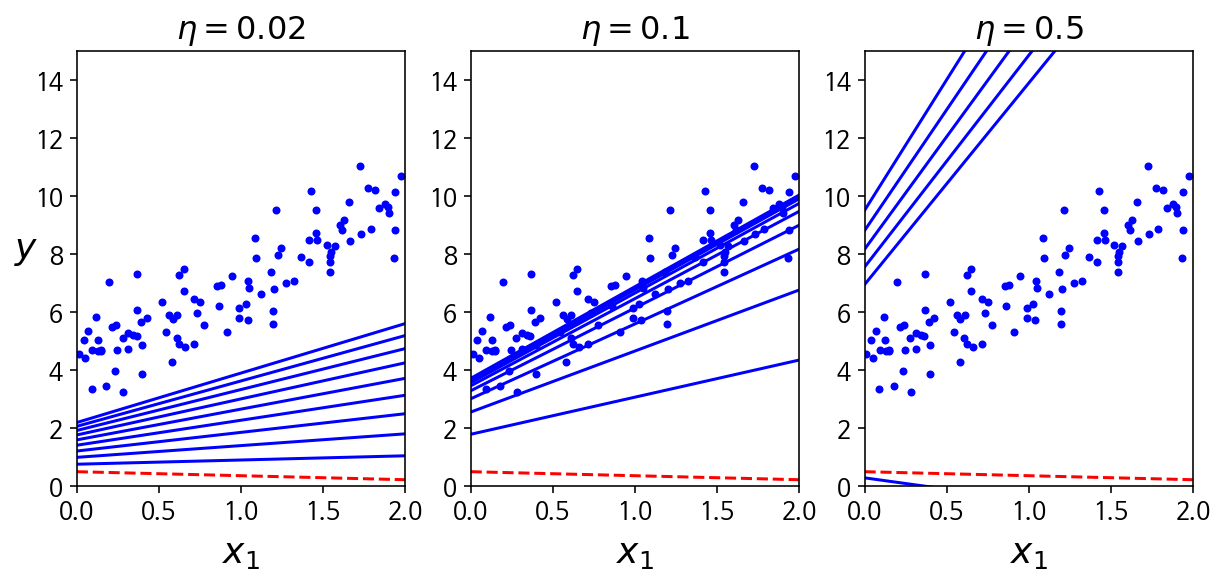

In [51]:
# 여러 학습률에 따른 경사 하강법 그래프

print("* 여러 학습률에 따른 경사 하강법")
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

- $\eta = 0.1$이 가장 적당하다.
- 적절한 학습률을 찾기 위해 그리드 탐색을 사용한다. 
- 반복 횟수를 아주 크게 지정하고, 벡터의 노름이 어떤 값 $\varepsilon$ 보다 아주 작아지면 경사하강법이 거의 최솟값에 도달한 것이므로 알고리즘(그리드 탐색)을 중지하자!

#### 2) 확률적 경사 하강법
- 배치 경사 하강법의 문제는 매스텝에서 계산한다는 것 = 느림

1. 확률적 경사 하강법 (SGD) : 매 스탭에서 샘플을 무작위로 선택하고 기울기를 계산하여  큰 훈련 세트를 훈련 시킬 수 있다.
2. 단점 : 확률적이기 때문에 훨씬 불안정하고, 매끄러운 하강이 아닌 요동친다.
3. 해결 : learning rate을 크게 설정하고(지역 최솟값을 뛰어넘고 수렴하도록), 점차 작게 줄여서 전역 최솟값에 도달하게 하는 것이 좋다.
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/stocastic.png" width=50%> <br/>
> - 이러한 조절 과정들을 학습 스케줄(learning schedule)이라고 한다.

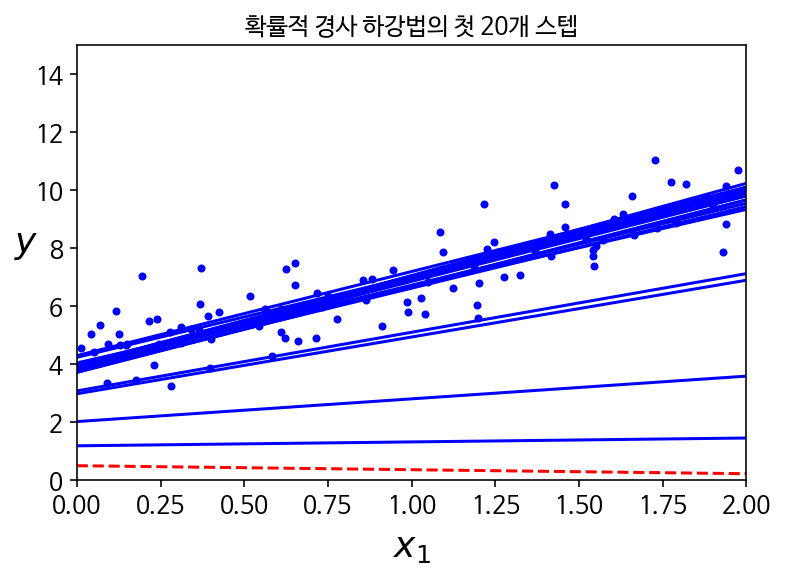

array([[4.21076011],
       [2.74856079]])

In [52]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):   # m번 반복 : 각 반복을 에포크(epoch)라고 한다.
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              
plt.title("확률적 경사 하강법의 첫 20개 스텝")
plt.show()                                           

theta

- 샘플을 무작위로 선택하므로 어떤 샘플은 한 epoch에서(m번 반복동안) 여러번 선택 될 수도 있고 아에 안쓰일 수도 있다.
- 한 epoch마다 다른 샘플을 사용하려면 차례로 하나씩 선택하고, 다시 섞고 하는 방식을 사용할 수 있다. (이는 사이킷런의 SGDRegressor와 SGDClassifier가 사용하는 방법이다.)
- 사이킷런에서 SGD방식으로 선형회귀를 사용하려면 default로 MSE(cost function)를 최소화 하는 SGDRegressor를 사용한다.

In [53]:
from sklearn.linear_model import SGDRegressor # 사이킷 런 구현

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# max_iter 최대 1000회 실행
# tol = 0.001 보다 적게 손실 줄어들때까지 실행
# eta0 = 기본 학습 스케줄인 학습률 0.1

sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [54]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

- 여기에서도 정규방정식의 값과 비슷한 값을 얻었다.

<br/>

#### 3) 미니배치 경사 하강법
1. 미니배치 경사하강법(Mini-batch Gradient Descent) : 각 스텝에서 전체 훈련세트(like batch)나 하나의 샘플(like SGD)을 기반으로 하지 않고, 미니 배치라고 부르는 임의의 작은 샘플 집합에 대해 gradient를 계산한다.
2. 장점 : GPU를 사용해 얻는 성능 향상, 미니배치를 어느 정도 크게 하면 파라미터 공간에서 SGD보다 덜 불규칙적으로 움직인다.
3. 단점 : 미니배치 경사하강법이 SGD보다 최솟값에 더 가까이 도달할 수 있지만 동시에 지역 최솟값에서 빠져나오기는 조금 더 힘들수도 있다(convex가 아닌경우).

In [55]:
# 미니 배치 경사하강법 : 배치와 확률의 중간
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.25214635],
       [2.7896408 ]])

In [56]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

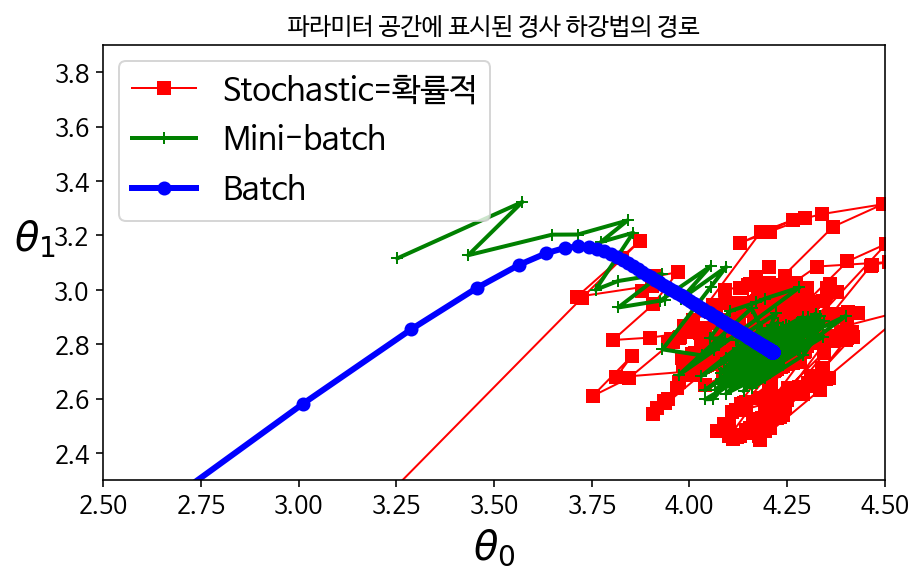

In [57]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic=확률적")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.title("파라미터 공간에 표시된 경사 하강법의 경로")
plt.show()

- 배치 경사하강법은 최솟값에서 멈춘 반면, SGD와 미니배치 경사하강법은 맴돌고 있음을 볼 수 있다.



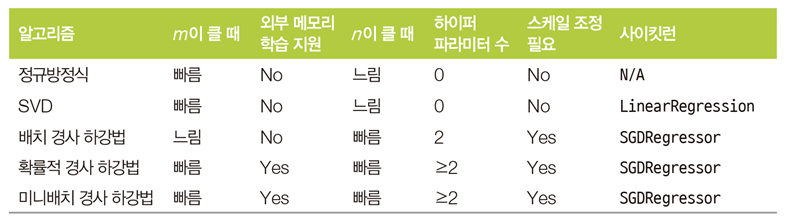

### 3. 다항 회귀
- 다항 회귀(polynomial regression) : 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형회귀 모델을 훈련시키는 기법


In [58]:
# 2차 방정식으로 비선형 데이터를 생성
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

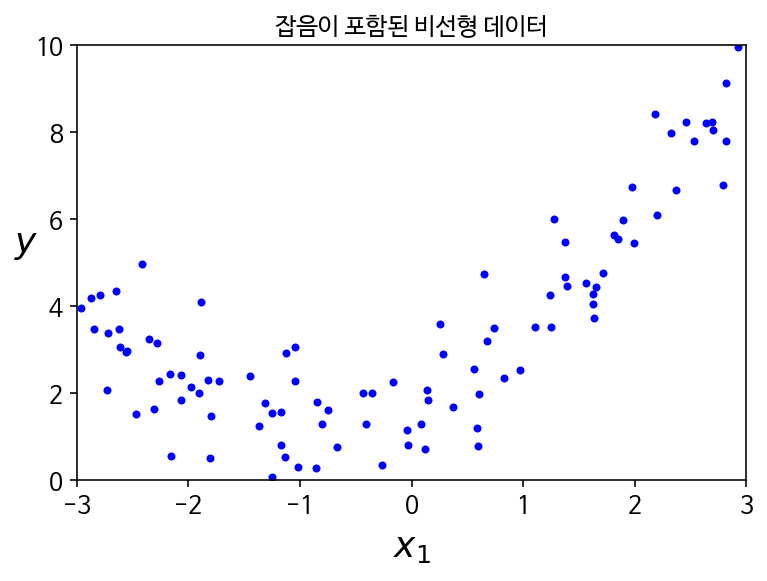

In [59]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("잡음이 포함된 비선형 데이터")
plt.show()

- 위의 데이터는 직선이 맞지 않으므로, Polynomial Features 를 사용해 훈련데이터를 변환   
ㄴ 각 특성을 제곱하여 새로운 특성으로 추가

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
X_poly[0]

[-0.75275929]


array([-0.75275929,  0.56664654])

In [61]:
# 확장된 훈련데이터에 Linear Regression을 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

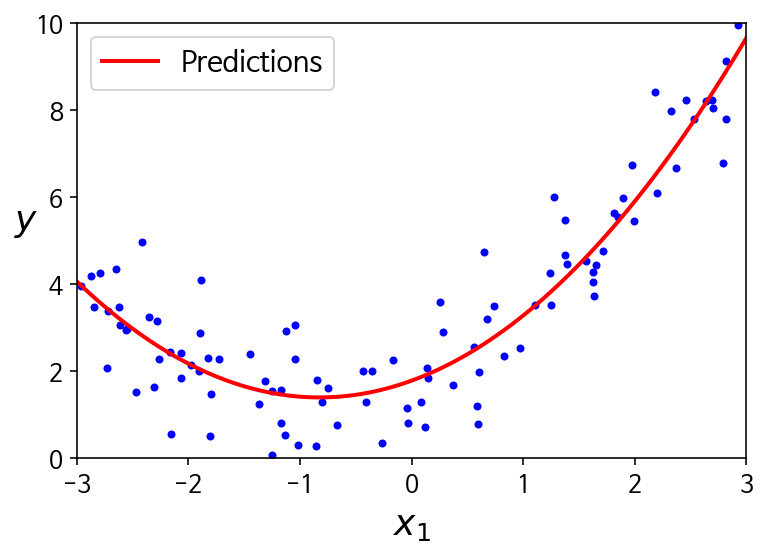

In [62]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

- 원래 함수 : $y = 0.5x_{i}^{2}+ 1.0x_{1} + 2.0 +$ 가우시안 잡음
- 예측 모델 :$ \hat{y} = 0.56x_{i}^{2}+ 0.93x_{1} + 1.78$
- 특성이 여러 개일 때 다항 회귀는 특성 사이의 관계를 찾을 수 있다. 
- ex) 두 개의 특성 $ a, b$ degree = 3으로 polynomialFeatrue를 적용하면 $ a^{2}, a^{3}, b^{2}, b^{3}$ 뿐만 아니라 $ ab, a^{2}b, ab^{2}$ 도 특성을 추가한다.

### 4. 학습 곡선
- 고차 다항 회귀를 적용하면, 보통의 선형 회귀보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.

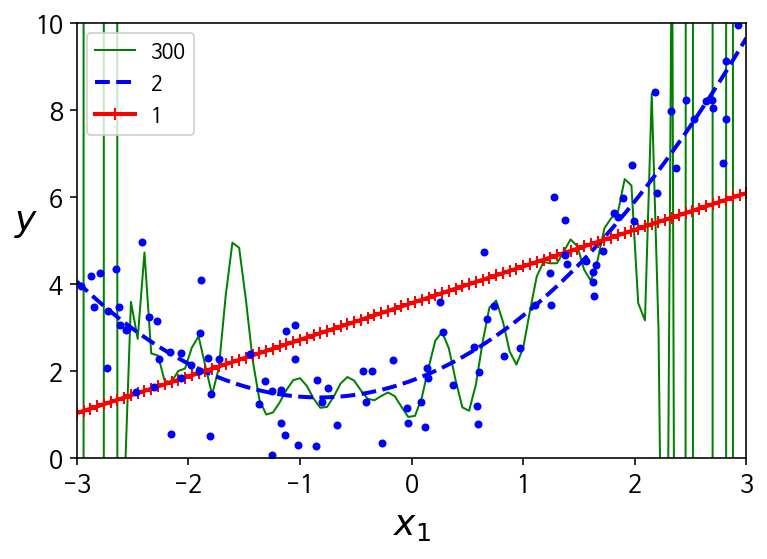

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- 위의 그림을 보면 300차 다항 회귀 : 과대적합, 1차 다항 회귀 : 과소 적합

#### 1) 학습 곡선
1. 학습 곡선 : 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타낸다.
2. 생성 방법 : 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 된다.

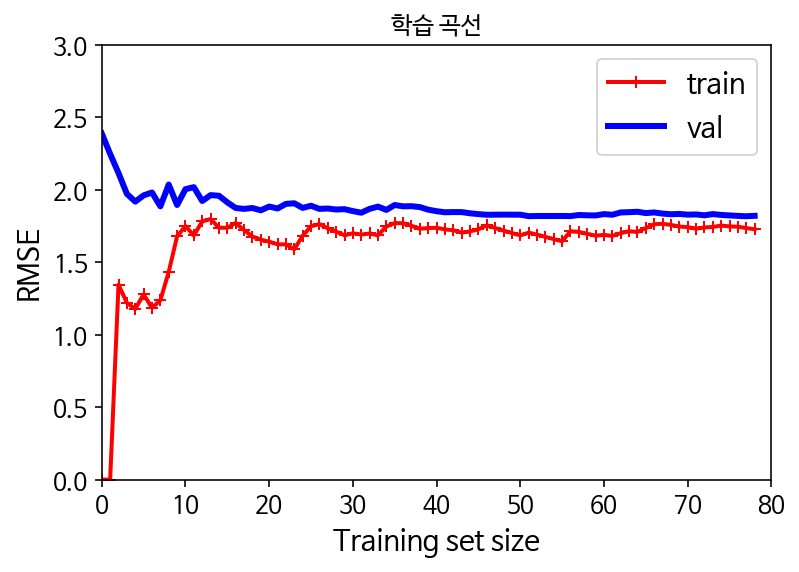

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])        
plt.title("학습 곡선")                 
plt.show()                                      

- 위의 그래프를 보자면, validation data가 적은 수로 훈련 될때는 검증 오차(RMSE)가 매우 크다
- 모델에 훈련 샘플이 추가됨에 따라 검증 오차가 천천히 감소한다.

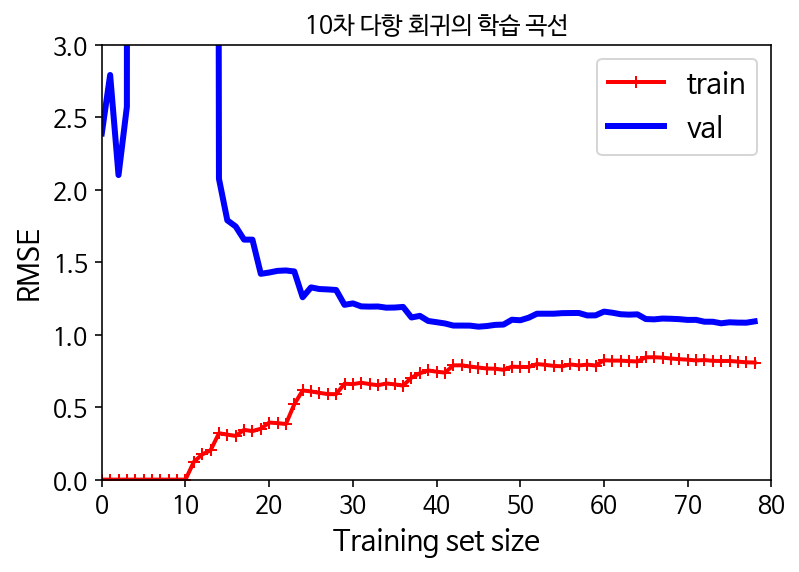

In [65]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])         
plt.title("10차 다항 회귀의 학습 곡선")  
plt.show()                      

- 위 그래프는 이전 학습 곡선과 다른 2가지 차이점이 있다. (과대적합 모델의 특징)
1. 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
2. 두 곡선 사이에 공간이 있다 = 훈련 데이터에서 모델 성능이 검증 데이터에서보다 훨씬 낫다는 것

<br/>

- 편향/분산 트레이드오프
1. 편향 : 잘못된 가정으로 실제 2차 인데 선형으로 가정하는 경우 = 과소적합되기 쉽다.
2. 분산 : 모델이 작은 변동에도 과도하게 민감. 자유도가 높은 모델이 높은 분산을 갖기 쉽다 = 과대적합 되기 쉽다
3. 줄일 수 없는 오차 : 데이터 자체에 잡음이 있는 경우. 잡음을 제거해야 한다. =이상치 감지하여 제거

<br/>

### 5. 규제가 있는 선형 모델
- 과대 적합을 감소 시키는 방법 : 다항식의 차수를 감소시키는 것. 가중치를 제한함으로써 규제를 가한다.

#### 1) 릿지 회귀
1. 릿지(Ridge) 회귀 : 규제가 추가된 선형 회귀 버전. 규제항이 비용 함수에 추가된다. 이는 모델의 가중치가 가능한 작게 유지되도록 노력하는 것   
$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2 $   
> - $\alpha$ : 모델을 얼마나 많이 규제할 것인지 조절
2.규제항은 훈련하는 동안에만 비용 함수에 추가된다.
3. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.


In [66]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

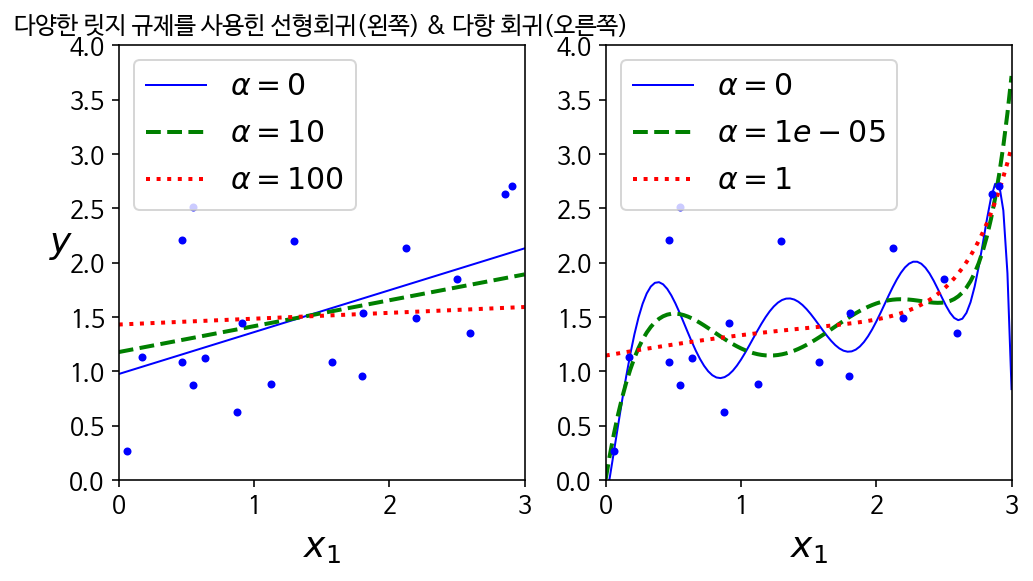

In [67]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("다양한 릿지 규제를 사용힌 선형회귀(왼쪽) & 다항 회귀(오른쪽)")
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

- $\alpha$를 증가시킬 수록 직선에 가까워 진다 = 모델의 분산 ↓, 편향 ↑
- 릿지 회귀의 정규 방정식
> $\boldsymbol{\hat{\theta}} = (\mathbf{X}^{T}\mathbf{X} + \alpha A )^{-1} {X}^{T}y$

In [68]:
# 정규방정식을 사용한 릿지 회귀를 적용 (행렬 분해 사용)
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [69]:
# 릿지 회귀를 적용 (확률적 경사 하강법 사용)
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

- panalty : 규제 지정 "l2"는 l2 노름의 제곱을 2로 나눈 규제항을 추가함

<br/>

#### 2) 라쏘
1. 라쏘(lasso) 회귀 : 가중치 벡터의 l1 노름을 사용    
$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|$   
2. 특징 : 중요한 특성의 가중치를 제거함 = 가중치가 0   
 ㄴ 자동으로 특성을 선택하고 희소 모델을 만든다.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


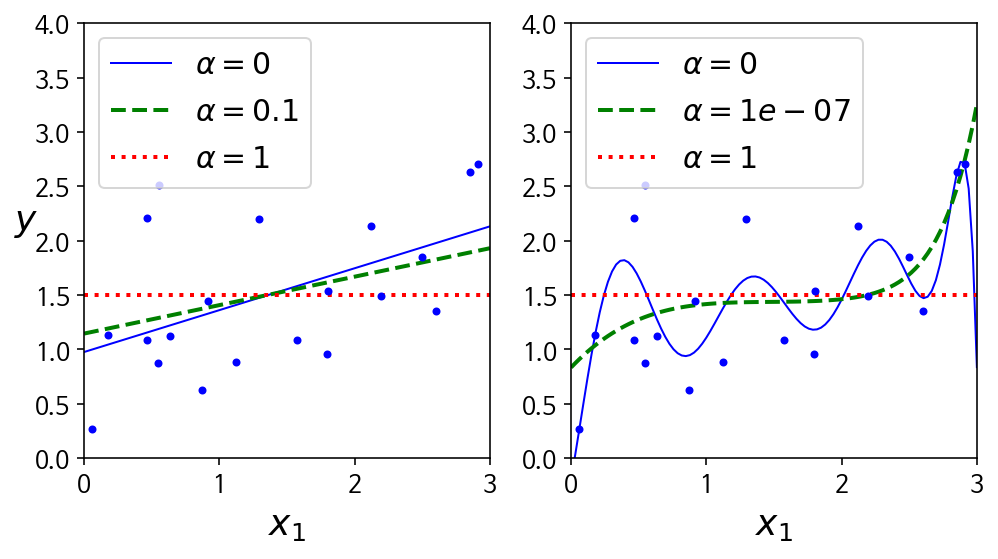

In [70]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.show()

<img src = "https://yganalyst.github.io/assets/images/ML/chap3/output_28_0.png" width = 70%>

1. MSE 비용함수는 동일하지만, ℓ1,ℓ2 페널티 그래프에 있는 등고선은 다르다(왼쪽 열).
2. 오른쪽 열은 비용함수에 규제항이 포함되어 있어서(라쏘와 릿지) 등고선이 다르게 나타나며초 최적 파라미터 값(빨간 네모)이 달라진 것을 볼 수 있다.
3. 라쏘 비용함수에서 배치 경사하강법의 경로가 전역 최솟값(빨간 네모)으로 가는 도중에 지그재그로 튀는 경향을 보이는데, 이는 $\theta_{2} = 0$에서 기울기가 갑자기 바뀌기 때문이다.
4. 라쏘의 비용함수가 $\theta_{i} = 0$에서 미분가능하지 않기 때문인데, 이를 위해 서브그래디언트 벡터 g(미분이 불가능한 지점 근방 그래디언트들의 중간값)를 사용할 수 있다.
5. 공식은 다음과 같다(경사하강법 적용을 위해 라쏘 비용함수에 사용할 수 있는 서브그래디언트 공식).   
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/lasso2.png">

In [71]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### 3) 엘라스틱넷
1. 엘라스틱 넷(Elastic Net) : 릿지와 라쏘를 절충한 모델
2. r = 0 = 릿지 회귀, r = 1 = 라쏘 회귀   
$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}$

In [72]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])
# l1_rate = 혼합 비율 = r

array([1.54333232])

#### 4) 조기 종료
1. 조기종료(early stopping) : 경사하강법과 같이 반복학습 알고리즘을 규제하는 방법. 검증 에러가 최솟값에 도달하면 훈련을 중지(조기 종료)시키는 것이다.
2. 다음은 배치 경사하강법으로 훈련시킨 복잡한 모델(고차원 다항회귀모델)을 보여준다.

In [73]:
# 비선형 데이터 생성
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

from sklearn.model_selection import train_test_split

# 훈련, 검증 데이터 셋 생성
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(),
                                                  test_size=0.5,
                                                  random_state=10)

In [74]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error

# 90차 다항회귀모델 및 스케일 조정
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

# 훈련, 검증 세트로 고차원 다항회귀모델을 통해 새로운 변수 추가(90개)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGD모델 생성
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,     # fit()메서드 호출마다 기존 유지
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

# 초기 검증오차 무한대로 지정
minimum_val_error = float("inf")
best_epoch = None
best_model = None

# 1000번의 epoch 실행
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 연속적인 fit메서드 호출
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # 검증 세트 훈련
    val_error = mean_squared_error(y_val, y_val_predict) # 검증 세트 평가
    
    # 검증 오차를 계속 비교해가면서 최적 단계와 모델 찾기
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

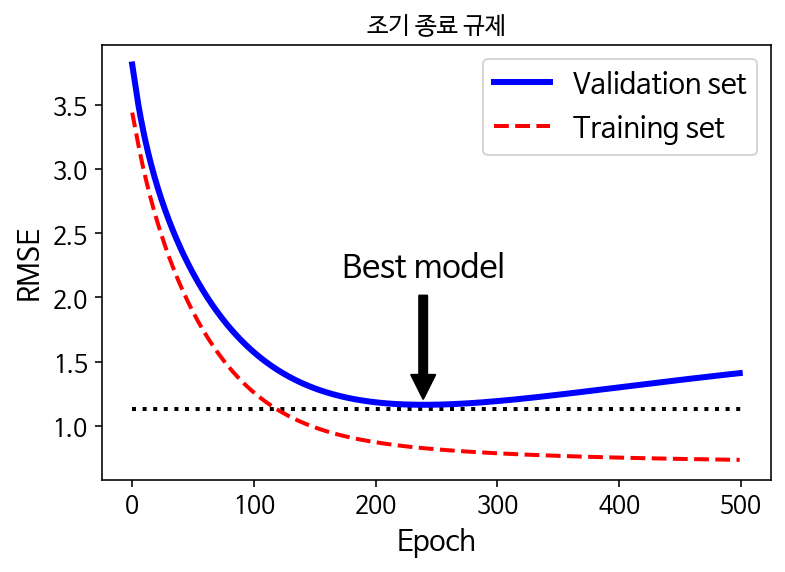

In [75]:
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 좀 더 보기좋게 표시하기 위함
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.title("조기 종료 규제")
plt.show()

### 6. 로지스틱 회귀
- 로지스틱 회귀(logistic regression)는 회귀 알고리즘이지만 분류문제에서 주로 사용된다.
- 추정 확률(predict_proba()와 같은)이 50%가 넘으면 해당 범주에 속한다고 예측하고, 아니면 속하지 않는다고 예측한다. 이것을 이진 분류기(Binary Classifier)라고 한다.

#### 1) 확률 추정
1. 로지스틱 회귀 모델 : 입력 특성의 가중치 합을 계산한다.(그리고 편향을 더한다.) 선형 회귀처럼 결과를 출력하지 않고 결괏값에 로지스틱을 출력한다.
2. 로지스틱 회귀 모델의 확률 추정(벡터식)
> $\hat{p} = h_{\theta}(x)=\sigma(\theta^{T}x)$   
3. 로지스틱 함수 = 시그모이드함수
> $\sigma(t) = \dfrac{1}{1+exp(-t)} $
4. S자 형태를 띄며, 어떤 값(t)을 대입하면 0~1사이의 값을 반환하도록 해준다. 0과 1사잇값의 값을 출력하는 시그모이드 함수
> <img src = "https://yganalyst.github.io/assets/images/ML/chap3/logistic3.png" width =20%>
5. 사이킷런의 LogisticRegression은 범주 레이블을 반환하는 predict()메서드와 (시그모이드 함수를 이용한)범주에 속할 확률을 반환하는 predict_proba()메서드를 가지고 있다.

<br/>

- 번외. 시그모이드 함수 도출 과정   
1. 무한의 값을 갖는 선형 회귀 식을 통해 두 개의 값(0또는 1)만을 갖는 결과를 가져와야 한다.
2. 두 개의 결과만을 도출하는 과정이 연속되면 확률이 되며 확률 또한 범위는 0부터 1까지로 제한된다.
3. 0부터 1까지로 값이 제한된 확률 값의 범위를 0부터 ∞로 확장하기 위해 odds 비를 취한다.
4. 0부터 ∞까지로 확장된 결과를 다시 -∞에서 ∞로 확장하기 위해 odds 비의 식에 자연로그를 취한다(이 과정을 logit 변환이라고도 한다).
5. 이제 양쪽의 식이 모두 -∞에서 ∞까지의 값을 갖게 되므로 등식이 성립하고 이 등식을 변형하면 우리가 원하는 로지스틱 함수가 도출된다.


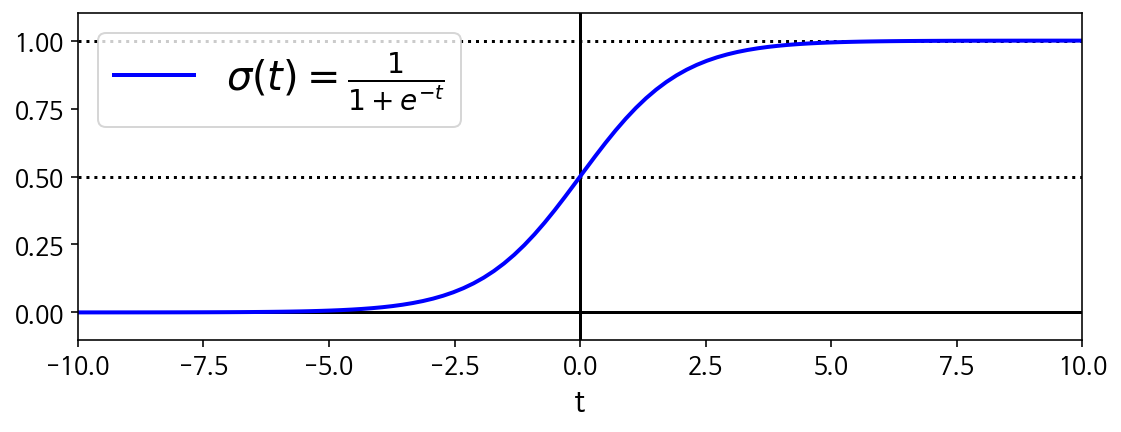

In [76]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

#### 2) 훈련과 비용 함수
1. 훈련의 목적 : 양성 샘플(y=1)에 대해서는 높은 확률, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\theta$를 찾는게 될 것이다.
2. 하나의 훈련샘플 X에 대해 나타낸 비용함수 식
> $
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$
> - t가 0에 가까워 질수록 -log(t)가 매우 커져서 비용이 크게 증가한다.
> - 양성 샘플(y=1)인데 이 확률을 0에 가깝게 추정(음성이라고 추정)하면 비용함수가 매우 커진다는 의미로 이해할 수 있다.
3. 로그 손실(log loss) : 전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용을 평균한 것이다. 이를  라고 하며 다음과 같이 쓸 수 있다.
$J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}$
> - 대괄호안을 보면 양성 범주일때 y(i)=1이 되고 1-y(i)=0이 되어 첫번째 항만 남게되고, 반대의 경우는 두번째 항만 남게 된다.
> - 결국 하나의 샘플에 대한 비용함수 $ c(\boldsymbol{\theta}) $식과 같아진다.
> - 이 비용함수는 정규방정식에서와 같이 최솟값을 계산하는 해가 존재하지 않는다. 단, 볼록함수이므로 경사하강법(또는 다른 최적화 알고리즘)이 전역 최솟값을 찾는 것을 보장한다.
4. 비용함수의 j번째 모델 파라미터 θj에 대해 편미분    
$\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}$   
> - 배치 경사하강법에서 배웠던 비용함수MSE의 편도함수와 매우 비슷한 형태이다.
> - 각 샘플에 대해 예측 오차를 계산하고, j번째 변수값을 곱하고, 모든 훈련 샘플 수로 나누어 평균을 낸다.
> - 마찬가지로 모든 편도함수를 포함한 그래디언트 벡터를 만들면 배치 경사하강법 알고리즘을 사용할 수 있다.

<br/>

#### 3) 결정 경계


In [77]:
# 데이터 로드
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [78]:
X = iris["data"][:,3:]    # 꽃잎의 너비 변수만 사용
y = (iris["target"]==2).astype("int")  # iris-Versinica면 1, 아니면 0

In [79]:
# 로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

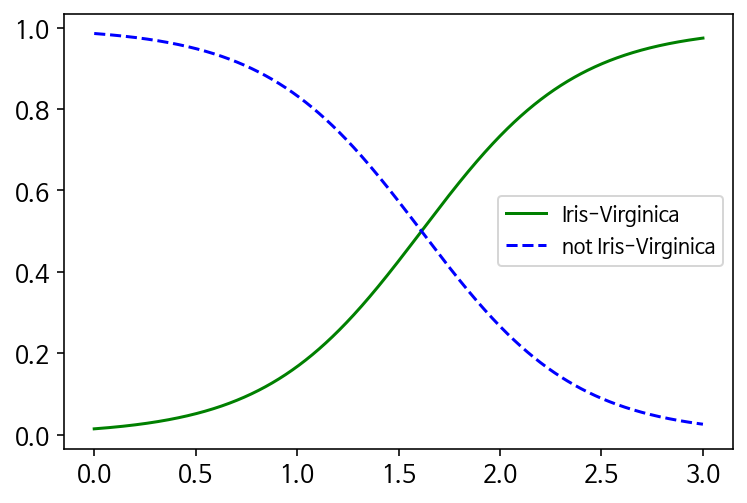

In [80]:
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "not Iris-Virginica")
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


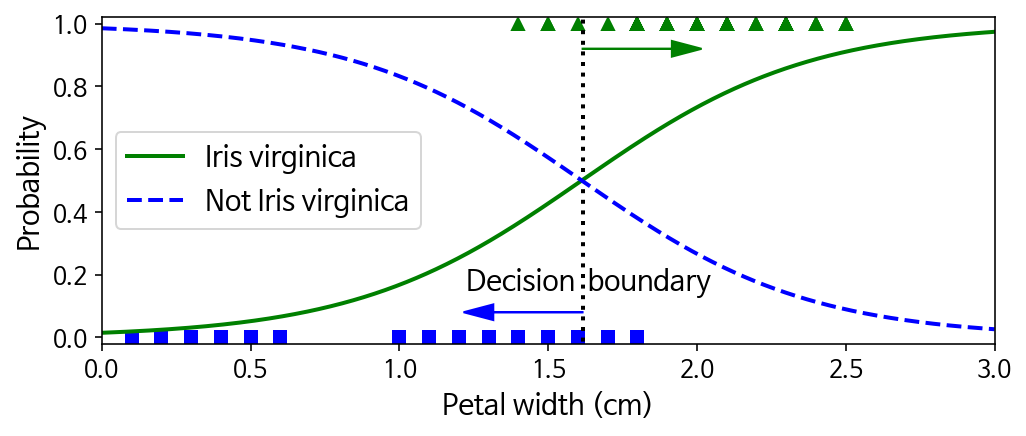

In [81]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")  # 음성범주 pointing
plt.plot(X[y==1], y[y==1], "g^")  # 양성범주 pointing

# 결정경계 표시
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

# 추정확률 plotting
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [82]:
decision_boundary

array([1.61561562])

In [83]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [84]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

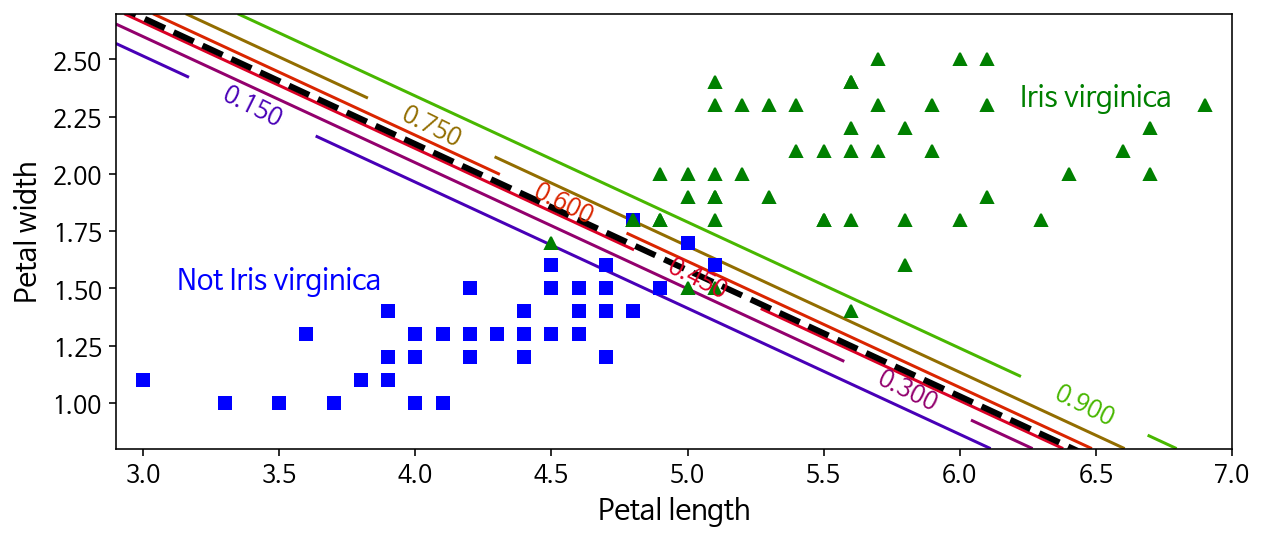

In [85]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

### 7. 소프트맥스 회귀
- 소프트맥스 회귀(Softmax Regression) : 로지스틱 회귀모델을 여러 개의 이진 분류기를 훈련시켜 연결하지 않고, 직접 다중 범주를 지원하도록 일반화 시킨 것

#### 1) 확률 추정
1. 샘플 X가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 s_k(x)를 계산하고, 그 점수에 소프트맥스 함수(또는 정규화된 지수함수)를 적용하여 각 범주별 속할 확률을 추정한다.
> <img src= "https://yganalyst.github.io/assets/images/ML/chap3/logistic7.png" width = 20%>
2. 샘플 x에 대해 각 범주들의 점수가 계산되면 소프트맥스 함수를 통과시켜 범주k에 속할 확률 p_hat_k를 추정한다
> <img src= "https://yganalyst.github.io/assets/images/ML/chap3/logistic8.png" width = 30%>   
> - k : 클래스=범주의 수
> - s(x) : 샘플 x에 대한 각 범주의 점수를 담고 있는 벡터
> - σ(s(x))k : 이 샘플이 범주 k에 속할 확률
3. 소프트맥스 회귀 분류기도 로지스틱 회귀와 마찬가지로 추정확률이 가장 높은 범주를 선택한다.
> <img src= "https://yganalyst.github.io/assets/images/ML/chap3/logistic9.png" width = 50%>   
> - argmax연산은 함수를 최대화하는 변수의 값을 반환한다(numpy에도 비슷한 함수가 있는데 array에서 최댓값을 가지는 원소의 index를 반환).
> - 위 함수에서는 추정확률 σ(s(x))k가 최대인 k값을 반환

<br/>

#### 2) 훈련과 비용 함수
1. 크로스 엔트로피(cross entropy) 비용함수를 최소화 하는 것은 타깃 범주에 대해 낮은 확률을 예측하는 모델을 억제하므로 목적과 부합하다.
> <img src= "https://yganalyst.github.io/assets/images/ML/chap3/logistic10.png" width = 50%>  
> - i번째 샘플에 대한 타깃 범주가 k일때, y(i)k가 1이고, 그 외에는 0이다.
> - 크로스 엔트로피는 추정된 범주의 확률이 타깃 범주에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다.
2. 비용함수의 θ(k)에 대한 그래디언트 벡터는 다음과 같다. 
> <img src= "https://yganalyst.github.io/assets/images/ML/chap3/logistic11.png" width = 50%>  
> 이제 비용함수를 최소화하기 위한 파라미터 행렬Θ를 찾기 위해 경사하강법을 사용할 수 있을 것이다.

- 사이킷런의 LogisticRegression은 범주가 2이상이면 일대다(OvA) 전략을 사용한다(분류 포스팅 참고).
- 하지만 multi_class='multinomial'옵션을 주면 소프트맥스 회귀를 사용할 수 있다.
- 또한 solver='lbfgs'옵션을 주어 소프트맥스 회귀를 지원하도록 알고리즘을 지정해야 한다.
- 그리고 하이퍼파라미터 C를 사용하여 조절할 수 있는 ℓ2규제가 적용된다.



In [86]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이와 너비 변수
y = iris["target"]           # 3개의 범주 그대로 사용

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
softmax_reg.predict([[5,2]])

array([2])

In [88]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

- 약 94%의 확률로 Iris-Verginica(y=2)라고 분류하는 것을 알 수 있다.

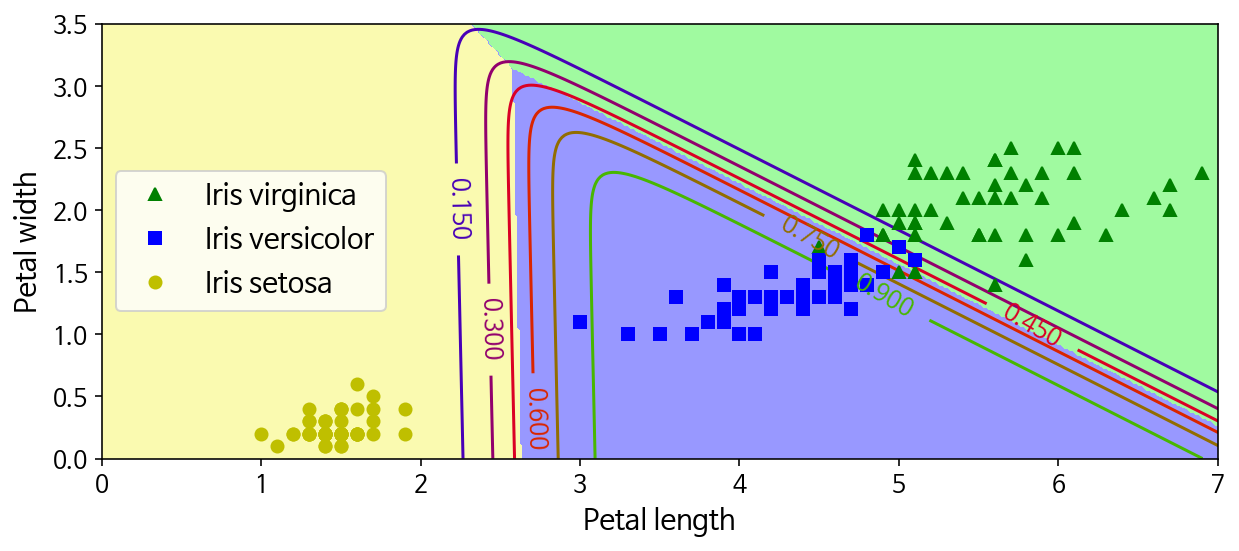

In [89]:
# 새로운 샘플 생성
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

#### 3) 결정 경계
- 3개의 범주지만, 범주와 범주 사이의 결정경계(배경색)가 모두 선형임을 알 수 있다.
- 이 모델은 이진분류와 달리 0.5의 경계가 아니라 범주에 속할 확률이 0.5 이하 이더라도 분류한다는 점을 유의하자(범주가 2개보다 많으므로).
- 예를들어 모든 결정경계가 만나는 지점은 동일하게 33.3%의 추정확률을 갖는다.

